In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

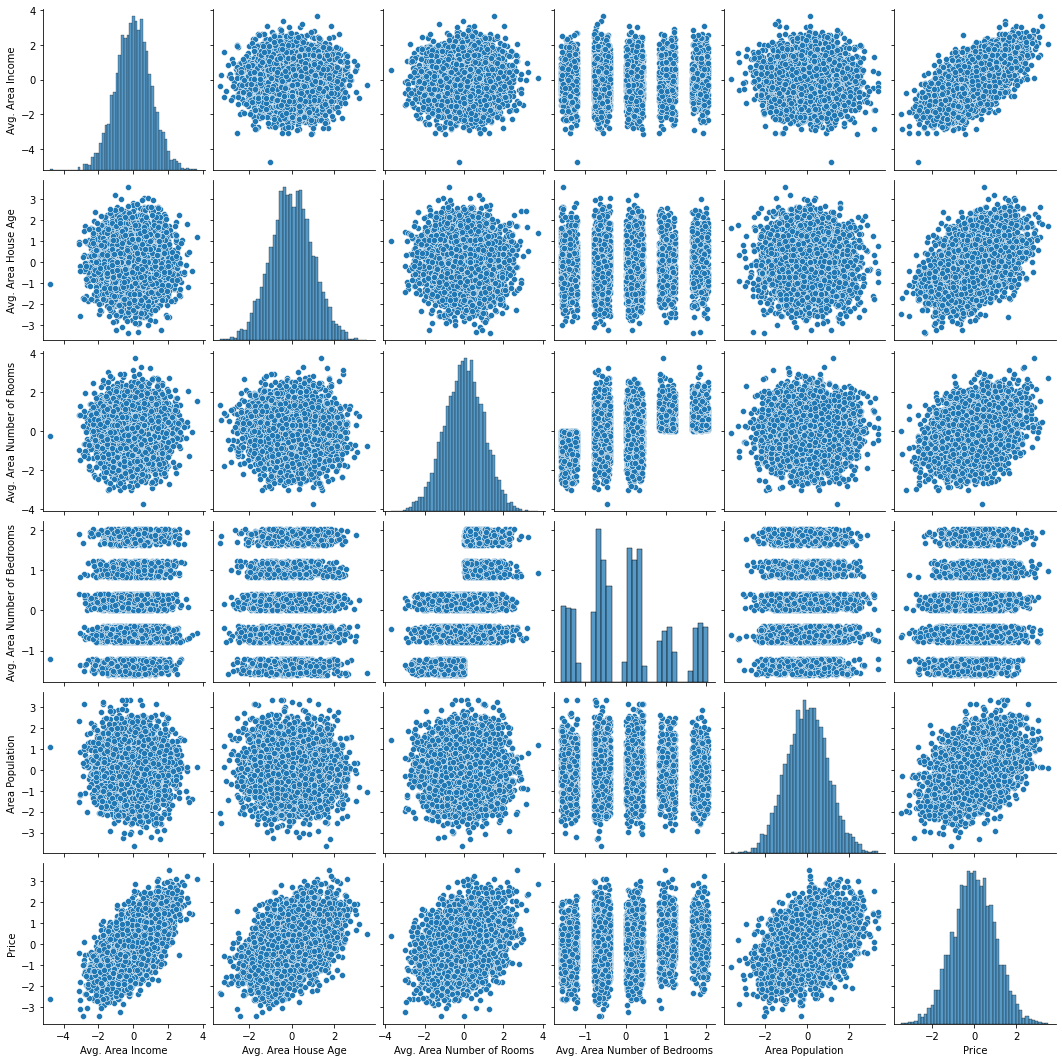

In [2]:
data=pd.read_csv('Downloads//USA_Housing.csv')
del data['Address']
data=(data-data.mean())/data.std()
sns.pairplot(data)

<AxesSubplot:xlabel='Price', ylabel='Count'>

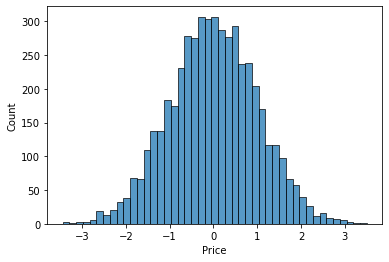

In [3]:
sns.histplot(data['Price'])


In [4]:
data.insert(0,'ones',1)
X_train, X_test, y_train, y_test=train_test_split(data.iloc[:,0:6], data.iloc[:,5:6],test_size = 0.4, random_state=10)

In [5]:
def cost(theta,x,y):
    theta=np.matrix(theta)
    x=np.matrix(x)
    y=np.matrix(y)
    cst=np.power((x*theta.T)-y,2)
    return np.sum(cst)/(2*len(x))

In [6]:
def gredient(theta,x,y,rate,itret):
    theta=np.matrix(theta)
    x=np.matrix(x)
    y=np.matrix(y)
    temp=np.matrix(np.zeros(theta.shape))
    param=int(theta.ravel().shape[1])
    grad=np.zeros(param)
    for i in range(itret):
        error=(x*theta.T)-y
        for j in range(param):
            term = np.multiply(error,x[:,j])
            temp[0,j]=theta[0,j]-((rate/len(x))* np.sum(term))
        grad=temp
    return grad

In [7]:
theta=np.zeros(6)
theta=gredient(theta,X_train,y_train,1,400)
cost_train=cost(theta,X_train,y_train)
print(theta)
print(cost_train)

[[-0.00735729 -0.0270827   0.01233017 -0.01543867 -0.0211794   0.97290561]]
0.0012892434847619708


In [8]:
def predict(theta,x):
    theta=np.matrix(theta)
    return[(theta[0,0]+theta[0,1]*x1+theta[0,2]*x2+theta[0,3]*x3+theta[0,4]*x4+theta[0,5]*x5) for
           x1,x2,x3,x4,x5 in zip(x['Avg. Area Income'],x['Avg. Area House Age'],
                                 x['Avg. Area Number of Rooms'],x['Avg. Area Number of Bedrooms'],x['Area Population'])]

In [9]:
predictions=predict(theta,X_test)
predictions

[-0.6996054517750212,
 -0.12222278253484896,
 0.05601719808151865,
 -1.0059261264743884,
 0.11543859556646782,
 -0.3786606667927406,
 0.03882021400191049,
 0.031507897351378565,
 -0.5644004387864485,
 0.4960843905232235,
 0.8951989704974747,
 1.8348639738093464,
 0.14038215431349566,
 -1.1742069119365222,
 0.6021494503097535,
 -1.1241314992921152,
 -1.5349971608531683,
 -0.8346461571212902,
 -1.1650014544022098,
 -1.076475304586425,
 -0.43391172364317226,
 -1.667442270706212,
 1.8899786424997116,
 0.2930166295585675,
 0.44429899420000335,
 0.3997901590156776,
 -2.786671200879465,
 -0.20523242888325352,
 -0.16137947712774792,
 0.526226743287982,
 -1.7414691444805754,
 1.1047851907804822,
 -0.22389587060957783,
 -1.968774247079957,
 0.5291115525264126,
 1.7003536664699952,
 0.4348850071258536,
 -0.9086767145209104,
 1.2202251865335796,
 0.5407840744836694,
 1.2304292230085665,
 2.1985026052425494,
 0.9253489901521788,
 0.7960555229823446,
 -1.261507069043879,
 0.6460416901866272,
 0.6438

In [10]:
Accuracy =np.sum(np.power((np.matrix(y_test)-np.matrix(predictions)),2))
Accuracy

8099699.782293501